In [12]:
import cv2
import sympy
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import json


In [99]:
def showimg(img):
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Converts from one colour space to the other

    plt.imshow(img2)
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()

# contours = np.array([[50,50], [50,150], [150,150], [150,50]])
# image = np.zeros((200,200), dtype=np.uint8)
# cv2.fillPoly(image, pts = [contours], color =(255,255,255))
# showimg(image)

In [96]:
path_map = Path("../../maps/g4/jump.json")
if not path_map.exists():
    raise ValueError(f"Invalid Path: {path_map}")

with path_map.open('r') as fd:
    map = json.load(fd)

print(map)
grass = np.array(map["map"])
target = np.array(map["target"])
start = np.array(map["start"])
sand = [np.array(x) for x in map["sand traps"]]

print("grass: ", grass)
print("target: ", target)
print("start: ", start)
print("sand: ", sand)


{'map': [[97.6887817382812, 201.312286376953], [95.6926879882812, 373.395751953125], [218.277221679688, 375.143798828125], [215.368530273438, 300.868469238281], [445.172485351562, 302.136962890625], [444.94384765625, 494.885375976563], [460.258422851563, 495.342529296875], [465.60546875, 164.73291015625], [467.891357421875, 94.78857421875], [468.092895507812, 58.4974365234375], [571.86669921875, 61.2005004882812], [557.102661132812, 494.471923828125], [690.820556640625, 492.871887207031], [650.922119140625, 54.1076965332031], [566.144897460937, 57.5363464355469], [468.5419921875, 54.3362731933594], [459.856079101563, 56.6220397949219], [451.781616210937, 59.4614868164062], [446.23291015625, 298.705627441406], [215.823364257813, 296.623291015625]], 'start': [148.164184570313, 324.510131835937], 'target': [614.890869140625, 427.571105957031], 'sand traps': [[[447.205932617188, 381.275695800781], [447.954467773438, 434.642944335937], [446.5830078125, 450.871826171875], [458.468994140625, 

In [97]:
# grass = np.array(grass)
xmin = grass[:, 0].min()
xmax = grass[:, 0].max()
ymin = grass[:, 1].min()
ymax = grass[:, 1].max()
print("")
print("xmin: ", xmin)
print("xmax: ", xmax)
print("ymin: ", ymin)
print("ymax: ", ymax)
print("")

REGION_SIZE = 5  # meters. Each region will correspond to 1 pixel
PADDING = 20  # meters. Extra space around the green

# Translate the points so that there's only PADDING amount of free space around the grass
offset_x = xmin - PADDING
offset_y = ymin - PADDING
grass[:, 0] -= offset_x
grass[:, 1] -= offset_y

xmin = grass[:, 0].min()
xmax = grass[:, 0].max() + PADDING
ymin = grass[:, 1].min()
ymax = grass[:, 1].max() + PADDING
print("")
print("xmin: ", xmin)
print("xmax: ", xmax)
print("ymin: ", ymin)
print("ymax: ", ymax)
print("")


# Convert the other shapes
target[0] -= offset_x
target[1] -= offset_y

start[0] -= offset_x
start[1] -= offset_y

for s in sand:
    s[:, 0] -= offset_x
    s[:, 1] -= offset_y

# print("\ngrass: ", grass)
# print("target: ", target)
# print("start: ", start)
# print("sand: ", sand)


# convert to int (so resolution of 1m)
grass_int = grass.round().astype(np.int32)
target_int = target.round().astype(np.int32)
start_int = start.round().astype(np.int32)
sand_int = [x.round().astype(np.int32) for x in sand]

print("\ngrass: ", grass_int)
print("target: ", target_int)
print("start: ", start_int)
print("sand: ", sand_int)



xmin:  95.6926879882812
xmax:  690.820556640625
ymin:  54.1076965332031
ymax:  495.342529296875


xmin:  20.0
xmax:  635.1278686523438
ymin:  20.0
ymax:  481.2348327636719


grass:  [[ 22 167]
 [ 20 339]
 [143 341]
 [140 267]
 [369 268]
 [369 461]
 [385 461]
 [390 131]
 [392  61]
 [392  24]
 [496  27]
 [481 460]
 [615 459]
 [575  20]
 [490  23]
 [393  20]
 [384  23]
 [376  25]
 [371 265]
 [140 263]]
target:  [539 393]
start:  [ 72 290]
sand:  [array([[372, 347],
       [372, 401],
       [371, 417],
       [383, 418],
       [384, 402],
       [383, 351],
       [385, 348]], dtype=int32), array([[374, 148],
       [374, 220],
       [387, 219],
       [389, 149]], dtype=int32)]


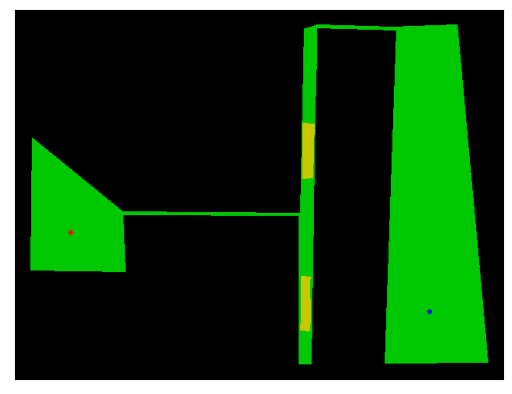

In [98]:
# RGB REPRESENTATION OF MAP

# Create black image size of map + padding
map_img = np.zeros((int(ymax), int(xmax), 3), dtype=np.uint8)

# Add grass
cv2.fillPoly(map_img, np.array([grass_int]), (0, 200, 0))
# showimg(map_img)

# Add sand
for trap in sand_int:
    cv2.fillPoly(map_img, np.array([trap]), (0, 200, 200))

# Add start and end
cv2.circle(map_img, start_int, 3, (0,0,255), -1)
cv2.circle(map_img, target_int, 3, (255,0,0), -1)

showimg(map_img)


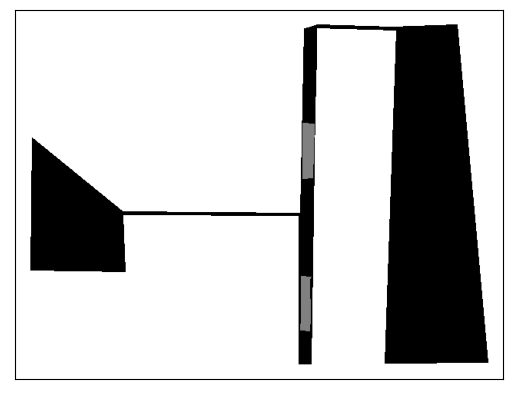

In [100]:
# B&W REPRESENTATION OF MAP for RISK

# Create black image size of map + padding
map_img = np.ones((int(ymax), int(xmax)), dtype=np.uint8) * 255

# Add grass
cv2.fillPoly(map_img, np.array([grass_int]), 0)

# Add sand
for trap in sand_int:
    cv2.fillPoly(map_img, np.array([trap]), 128)

showimg(map_img)

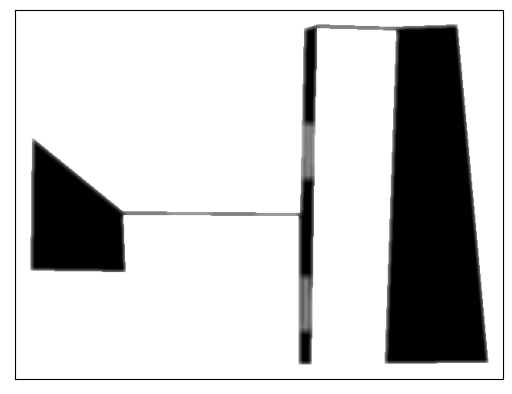

In [103]:
map_blur = cv2.blur(map_img,(10,10))
map_blur[map_img == 255] = 255
showimg(map_blur)


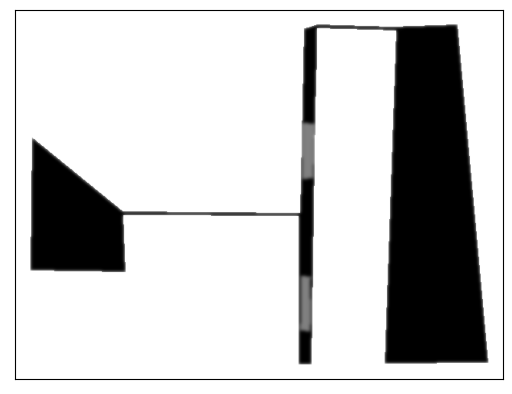

In [118]:
std_dev = 2
map_blur_guass = cv2.GaussianBlur(map_img, (21,21), std_dev)
map_blur_guass[map_img == 255] = 255
showimg(map_blur_guass)

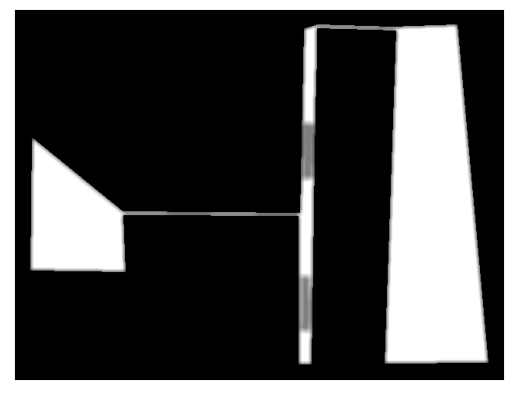

In [114]:
map_blur_guass = 255 - map_blur_guass
showimg(map_blur_guass)